# Project: No Show Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is aimed at analysing a dataset with information obtained from 100 thousand medical appointments in Brazil to determine which factors contribute to individuals showing up or not showing up for their appointments.

This dataset collects information from 100k medical appointments in Brazil and is focused on the questionof whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:
>  ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

>  ‘Neighborhood’ indicates the
location of the hospital.

> ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

> Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

This project will look into all this factors, analyse and determine their relation to wether a patient will show up or not show up for their appointments.
This following questions will be addressed for the analysis:


1. Individuals who receives sms's are most likely to show up for their appointments ?
2. Females are most likely to show up for their appointments?
3. Is the younger generation likely to miss their appointments as compared to the older generation?
4. Diabetic patients are most likely to attend their appointments?
5. Hipertension patients are most likely to show up for their appointments?
6. Patients who do not take alcohol are most likely to attend their appointents?
7. Patients who are on scholarship are most likely to show up for appointments?



In [1]:
#importing libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data wrangling

---
    
Data wrangling is a technique that aids in understanding the various aspects of the data. It is a process of performing initial investigation on data to discover patterns and any untidyness that may be present in the data.

In this section, the provided dataset will be loaded and an exploratory data analysis will be performed. This assists in gaining an indepth familiarity with the data and discovering patterns, issues or any discrepencies that the datasets may countain.

---

>

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

- dataset has 110527 entries and 14 columns as can be seen above.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- All features have no missing values as can be seen by the number of non-null values.
- Data types for each feature can be seen above.
- ScheduledDay and AppointmentDay are both of object datatype instead of datetime as they reflect the dates.

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- As can be seen above no feature contains missing values.

In [6]:
sum(df.duplicated())

0

- No duplicates are present.

In [7]:
df['PatientId'].nunique()

62299

- There are 62299 unique patientId's.
- This means there are 62299 patients on the data.

In [8]:
df['AppointmentID'].nunique()

110527

In [9]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

- There are two types of values in gender namely: 

> F = Female

> M = Male

In [10]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

- Locations of the hospitals can be seen above

In [11]:
df.Scholarship.unique()

array([0, 1], dtype=int64)

Scholarship as explained in introduction shows whether a patient is enrolled in the Brasilian welfare program:

> 1 = Yes

> 0 = No

In [12]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

- Above we see the age values of patients
- There is one abnormal age which is '-1', there is no individual with a negative age.

In [13]:
df.Hipertension.unique()

array([1, 0], dtype=int64)

The Hipertension feature has two unique values as 1 and 0:

> 1 = Has Hipertension

> 0 = No Hipertension

In [14]:
df.Diabetes.unique()

array([0, 1], dtype=int64)

Diabetes column has two unique values being 1 and 0 :

> 1 = Diabetic

> 0 = Not Diabetic

In [15]:
df.Alcoholism.unique()

array([0, 1], dtype=int64)

Alcoholism has two unique values:

> 1 = Consumes Alcohol

> 0 = Does Not Consume Alcohol

In [16]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

- Handcap has four different types values which cannot be explained.
- Further Investigation needed into this feature

In [17]:
df.SMS_received.unique()

array([0, 1], dtype=int64)

Received sms feature contains two unique values:

> 1 = Received SMS

> 0 = Did not receive SMS

In [18]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

The Noshow feature also has two unique values:

> No = Showed up

> Yes = did not show up

<a id='cleaning'></a>
## Data Cleaning

Clean data is the hero of all data science projects as it ensures the production of clean visualuals, models and ultimately business decisions.

In this section we clean all issues discovered in the wrangling process to ensure we have the most clean data to produce accurate indings and results.

In this section the following cleaning will be performed:
> Drop unecessary columns

> Rename columns

> Drop age -1 age row

First a copy of the original dataframe is created where cleaning will be performed.

In [19]:
#Create a copy of the original dataframe 
clean_df = df.copy()

In [20]:
clean_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 For this project the ScheduledDay and the AppointmentDay will be dropped

 The Handcap column will be dropped as values contained in the feature are not understood and further invetigations would need to be made.

In [21]:
#drop columns that will not be used for the project
clean_df.drop(['ScheduledDay', 'AppointmentDay','Handcap'], axis=1, inplace=True)

#confirmation of changes
clean_df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,No


Below the column names will be renamed to small letters, seperate names with underscores for naming consistencies.

In [22]:
#Renaming columns 
clean_df.rename(columns= {'PatientId':'patient_id','AppointmentID':'appointment_id','Gender':'gender','Age':'age','Neighbourhood':'neighbourhood','Diabetes':'diabetes','Alcoholism':'alcoholism','SMS_received':'sms_received','No-show':'no_show','Hipertension':'hipertension','Scholarship':'scholarship'}, inplace = True)
clean_df.head(1)

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,No


Age column

Recall the age column has a value -1 and it is impossible for a person to have a negative age.

Below we correct the -1 age by dropping that particylat row with an abnormal value.

In [23]:
#Locate the -1 age column
abnormal_age = clean_df.loc[clean_df['age'] == -1]


In [24]:
abnormal_age

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
99832,4.659432e+14,5775010,F,-1,ROMÃO,0,0,0,0,0,No


The abnormal -1 age is at index 99832 and below that particular row is dropped

In [25]:
#Drop the -1 age row
clean_df = clean_df.drop(99832)


In [26]:
#confirm changes
clean_df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [27]:
clean_df.shape

(110526, 11)

The data is one row less after removing the row with a negative age as can be seen above

The no_show column contains values yes and no

Below we map the Yes and No ro 0 and 1 respectively

In [28]:
# convert No/Yes to 0/1
clean_df= clean_df.replace({'no_show':{"No": 1, "Yes": 0}})

In [29]:
#Confirm Changes
clean_df.no_show.unique()

array([1, 0], dtype=int64)

 > 1 = Showed up
 
 > 0 = No show

<a id='eda'></a>
## Exploratory Data Analysis

In this section we explore the data further and dicover patterns and trends in our data.

This will aid in answering questions posed at the beginning of the project.

### 1. No show Versus Show Proportions

Below we explore the proportion of patients who showed up for their appointments and those who missed their appointments.

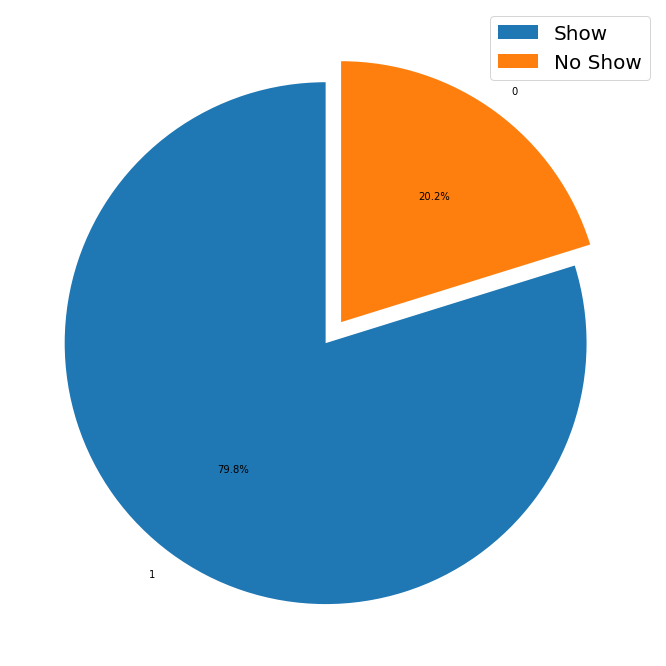

In [30]:

plt.figure(figsize=(16,12)) #set fig size
values = clean_df['no_show'].value_counts()/clean_df.shape[0]
labels = (clean_df['no_show'].value_counts()/clean_df.shape[0]).index
plt.pie(x=values, labels=labels, autopct='%1.1f%%', explode= (0.05, 0.05),startangle=90)
plt.legend(['Show', 'No Show'],loc='upper right',prop={'size': 20})
plt.show()

- As can be seen above, 79.8% patients who makes appointments did show up for their appointments.
- Only 20.2% of patients did not show up for their appointments.

### 2. Is the younger generation likely to miss their appointments as compared to the older generation?

In [31]:
pd.DataFrame(clean_df.groupby(['no_show'])['age'].describe())

,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
0,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0
1,88207.0,37.790504,23.338645,0.0,18.0,38.0,56.0,115.0


<Figure size 864x576 with 0 Axes>

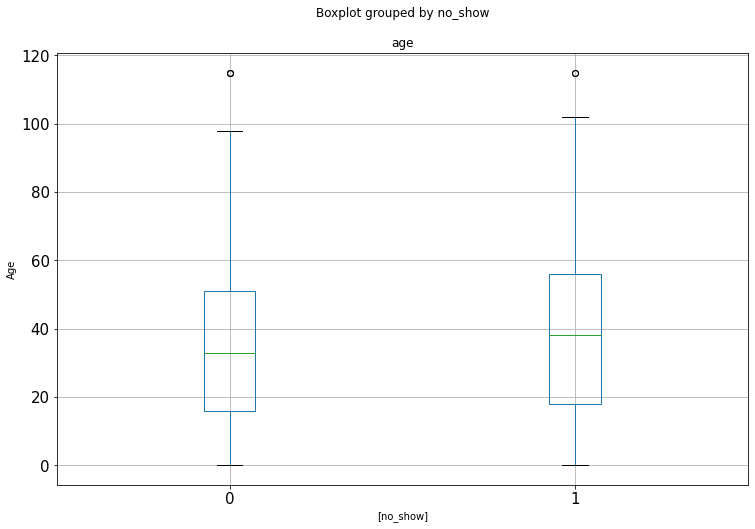

In [32]:
plt.figure(figsize=(12,8))
clean_df.boxplot(column= ['age'], by= ['no_show'], figsize=(12,8),fontsize=15);
plt.ylabel('Age')
plt.show()

- Both box and whiskers for those that showed up and those that did not are positively skewed 
- The min and max ages for both groups are 0 and 115 respectively
- The mean age for the group that did not show up and those that did show up is 34 and 38 respectively
- The mean age for those who showed up is greaer than for those who did not show up
- The interquartile range for the group that showed up is 37 and 34 for those who did not show i.e it is greater for those who showed up than for those who did not show up.
- Both groups have outliers
- Overall there is no much difference in the distribution of the two groups of data and it can be said age does not have any impact on whether patients show up or miss appointments.


### 3. Females are most likely to show up for appointments?

In [33]:
clean_df.groupby(['gender'])[['patient_id']].count()

,patient_id
gender,
F,71839
M,38687


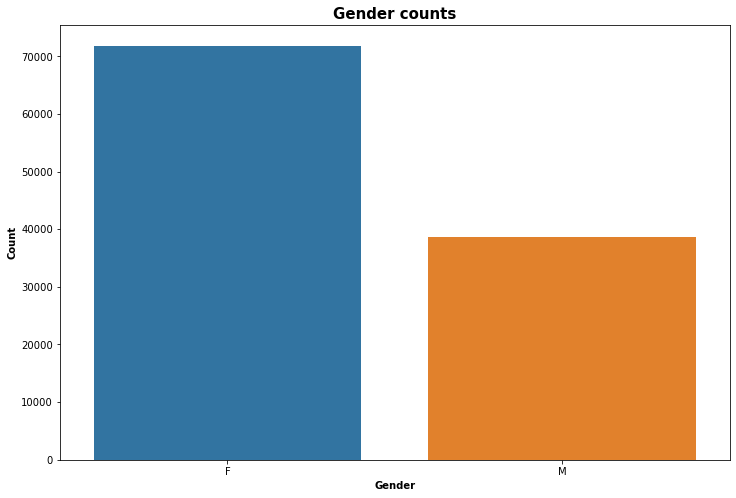

In [34]:
plt.figure(figsize=(12,8)) #set fig size
sns.countplot(x='gender' ,data = clean_df)
plt.ylabel('Count', weight='bold',fontsize=10)
plt.xlabel('Gender', weight='bold', fontsize=10)
plt.title('Gender counts',weight='bold', fontsize=15)
plt.show()

- The dataset has the majority number of Females as compared to Males.
- This means more females booked appointments as compared to males.

Below we exam if gender plays a role in patients not showing up for appointments

In [35]:
clean_df.groupby(['gender','no_show']).size().unstack('gender')

gender,F,M
no_show,,
0,14594,7725
1,57245,30962


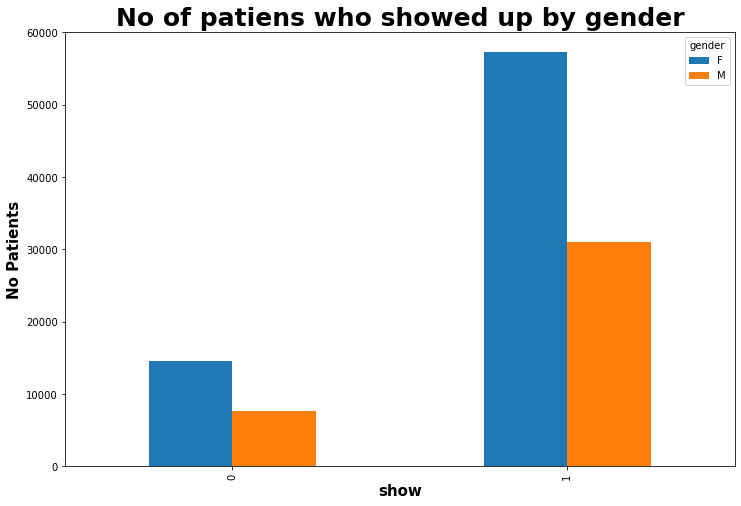

In [36]:
clean_df.groupby(['gender','no_show']).size().unstack('gender').plot(kind='bar',figsize=(12,8))
plt.title("No of patiens who showed up by gender", weight='bold', fontsize=25)
plt.ylabel("No Patients", weight='bold', fontsize=15)
plt.xlabel("show", weight='bold', fontsize=15)
plt.show()

- As can be seen above females are most likely to show up for their appointments as compared to males.

### 4. Patients who received sms's are most likely to show up for their appointments?

Below we investigate the relationship between whether a patient received an sms from the hospital and not showing up fr appointments.

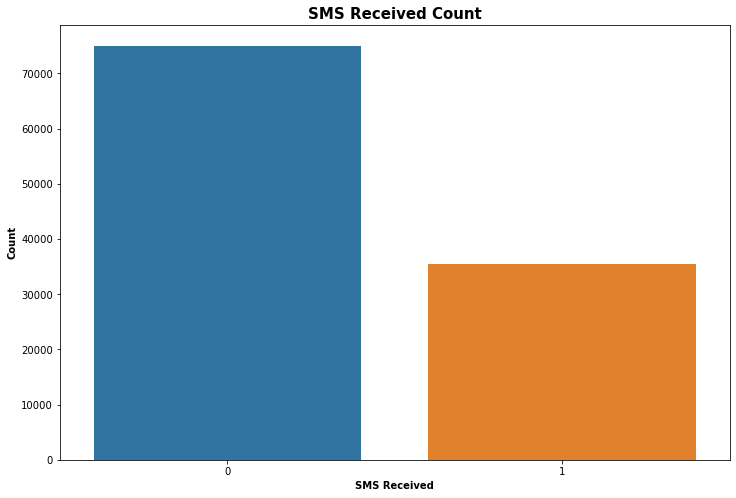

In [37]:
plt.figure(figsize=(12,8)) #set fig size
sns.countplot(x='sms_received' ,data = clean_df)
plt.ylabel('Count', weight='bold',fontsize=10)
plt.xlabel('SMS Received', weight='bold', fontsize=10)
plt.title('SMS Received Count',weight='bold', fontsize=15)
plt.show()

- From the above it can be noted that a significan amount of patients did not receive sms.

Below we look into how many patients showed up for their appointments for both groups, those that received and those that did not receive sms's

In [38]:
clean_df.groupby(['sms_received','no_show']).size().unstack('sms_received')

sms_received,0,1
no_show,,
0,12535,9784
1,62509,25698


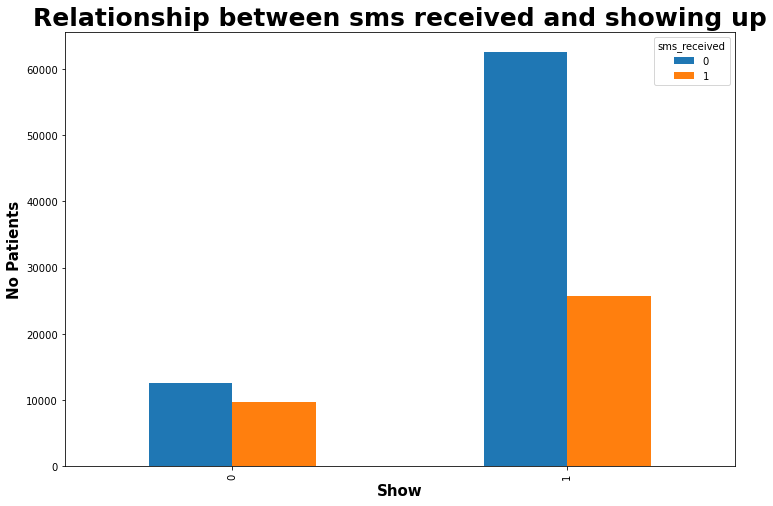

In [39]:
clean_df.groupby(['sms_received','no_show']).size().unstack('sms_received').plot(kind='bar', figsize=(12,8))
plt.title("Relationship between sms received and showing up", weight='bold', fontsize=25)
plt.ylabel("No Patients", weight='bold', fontsize=15)
plt.xlabel("Show", weight='bold', fontsize=15)
plt.show()

- Patients who did not receive sms's has a higher turn up as compared to those that received sms's.

###  5. Patients who are diabetic are most likely to attend appointments?

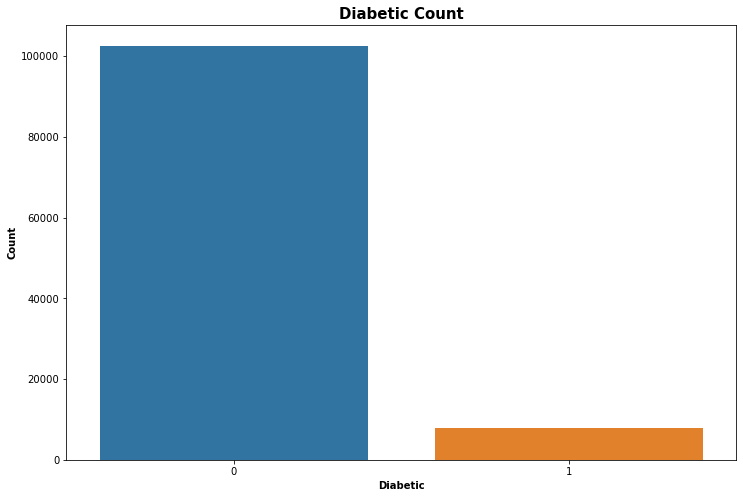

In [40]:
plt.figure(figsize=(12,8)) #set fig size
sns.countplot(x='diabetes' ,data = clean_df)
plt.ylabel('Count', weight='bold',fontsize=10)
plt.xlabel('Diabetic', weight='bold', fontsize=10)
plt.title('Diabetic Count',weight='bold', fontsize=15)
plt.show()

- The graph above shows that most patients that booked appointments are not diabetic
- Only a small portion of patients that made appointments are diabeti

Below we investigate which group is most likely to show up for appointments

In [41]:
clean_df.groupby(['diabetes','no_show']).size().unstack('diabetes')

diabetes,0,1
no_show,,
0,20889,1430
1,81694,6513


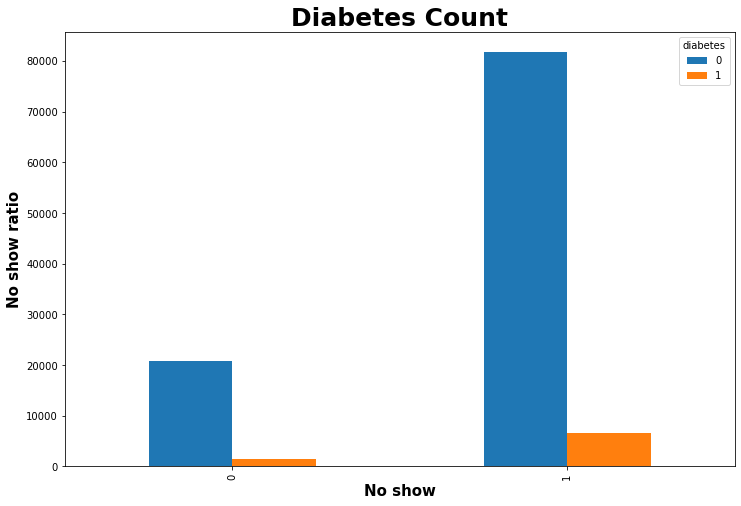

In [42]:
clean_df.groupby(['diabetes','no_show']).size().unstack('diabetes').plot(kind='bar', figsize=(12,8))
plt.title("Diabetes Count", weight='bold', fontsize=25)
plt.ylabel("No show ratio", weight='bold', fontsize=15)
plt.xlabel("No show", weight='bold', fontsize=15)
plt.show()

- Patients who are not diabetic seems to have a higher turn up as compared to those who are diabetic.

### 6. Patients with hipertension are most likely to show up for appointments?

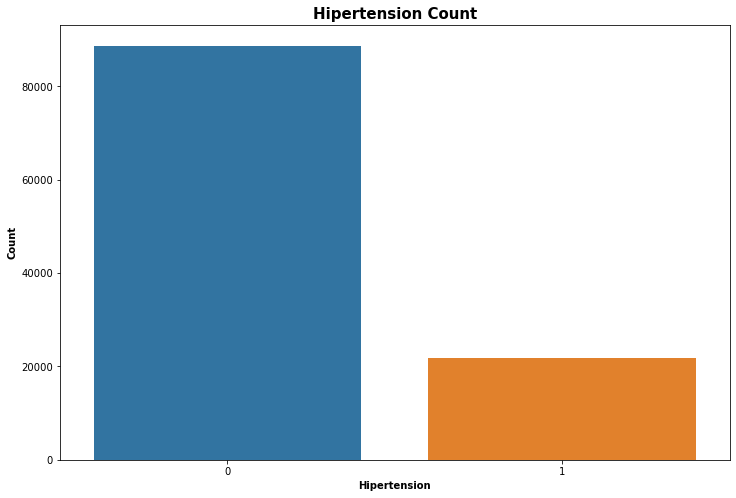

In [43]:
plt.figure(figsize=(12,8)) #set fig size
sns.countplot(x='hipertension' ,data = clean_df)
plt.ylabel('Count', weight='bold',fontsize=10)
plt.xlabel('Hipertension', weight='bold', fontsize=10)
plt.title('Hipertension Count',weight='bold', fontsize=15)
plt.show()

- Similar to the diabetic group, most patients who booked appointmets do not have hipertension.
- Only a small portion of the patients have hipertension

Below we inspect how does hipertension affect whether a patient will show up for their appointment or not.

In [44]:
clean_df.groupby(['hipertension','no_show']).size().unstack('hipertension')

hipertension,0,1
no_show,,
0,18547,3772
1,70178,18029


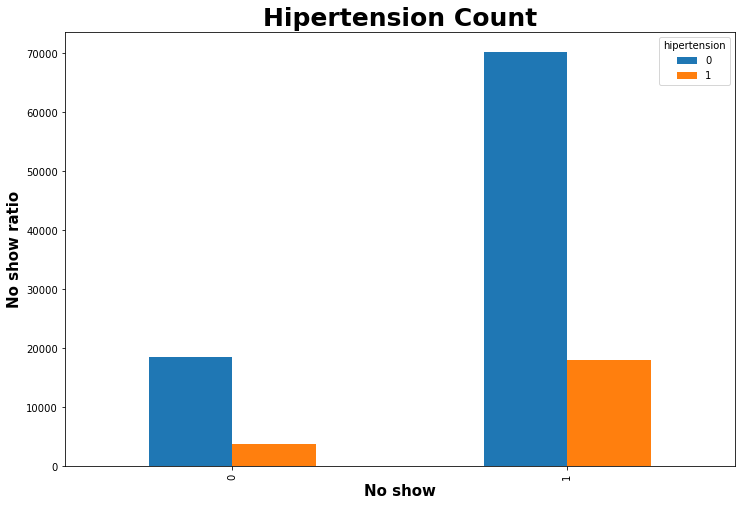

In [45]:
clean_df.groupby(['hipertension','no_show']).size().unstack('hipertension').plot(kind='bar', figsize=(12,8))
plt.title("Hipertension Count", weight='bold', fontsize=25)
plt.ylabel("No show ratio", weight='bold', fontsize=15)
plt.xlabel("No show", weight='bold', fontsize=15)
plt.show()

- Patients without hipertension have a higher rate of showing up to appointments as compared to those with hipertension.

### 7. Patients who do not take alcohol are most likely to attend appointments

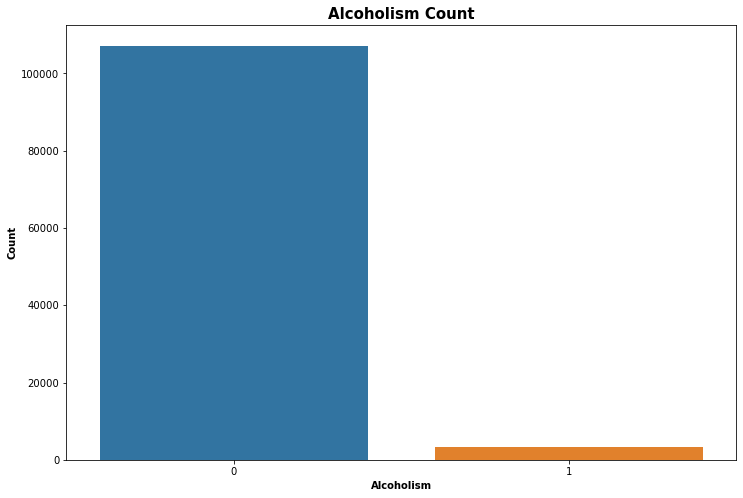

In [46]:
plt.figure(figsize=(12,8)) #set fig size
sns.countplot(x='alcoholism' ,data = clean_df)
plt.ylabel('Count', weight='bold',fontsize=10)
plt.xlabel('Alcoholism', weight='bold', fontsize=10)
plt.title('Alcoholism Count',weight='bold', fontsize=15)
plt.show()

- Only a small portion of the patients falls within the category of alcohilsm.

In [47]:
clean_df.groupby(['alcoholism','no_show']).size().unstack('alcoholism')

alcoholism,0,1
no_show,,
0,21642,677
1,85524,2683


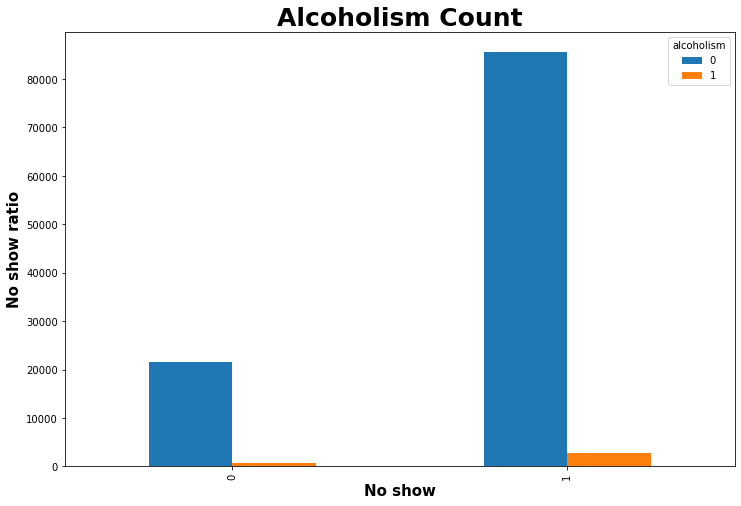

In [48]:
clean_df.groupby(['alcoholism','no_show']).size().unstack('alcoholism').plot(kind='bar', figsize=(12,8))
plt.title("Alcoholism Count", weight='bold', fontsize=25)
plt.ylabel("No show ratio", weight='bold', fontsize=15)
plt.xlabel("No show", weight='bold', fontsize=15)
plt.show()

- Non alcoholism patients are most likely to show up for their appointments as compared to patients who takes alcohol.

### 8. Patients who are enrolled in scholarship are most likely to show up for appointments

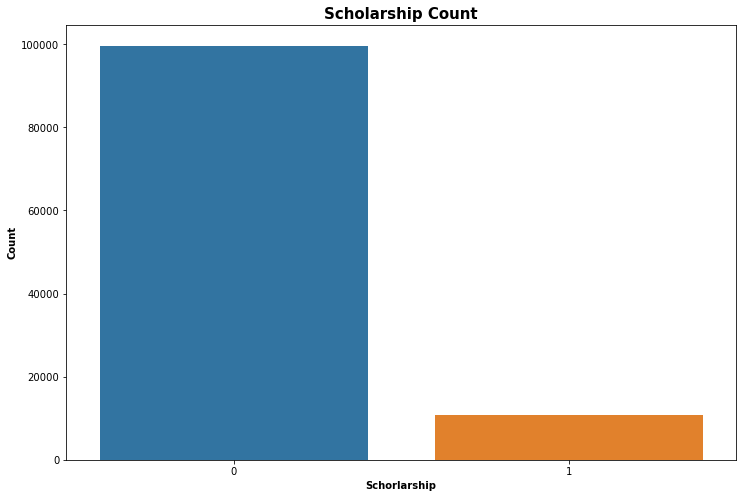

In [49]:
plt.figure(figsize=(12,8)) #set fig size
sns.countplot(x='scholarship' ,data = clean_df)
plt.ylabel('Count', weight='bold',fontsize=10)
plt.xlabel('Schorlarship', weight='bold', fontsize=10)
plt.title('Scholarship Count',weight='bold', fontsize=15)
plt.show()

- Only a few portion enrolled in the Brasilian Welfare program booked appointments.

In the same way, we inspect the relationship between whether a patients is enrolled/ not enrolled to the program and showing up for their appointments.

In [50]:
clean_df.groupby(['scholarship','no_show']).size().unstack('scholarship')

scholarship,0,1
no_show,,
0,19741,2578
1,79924,8283


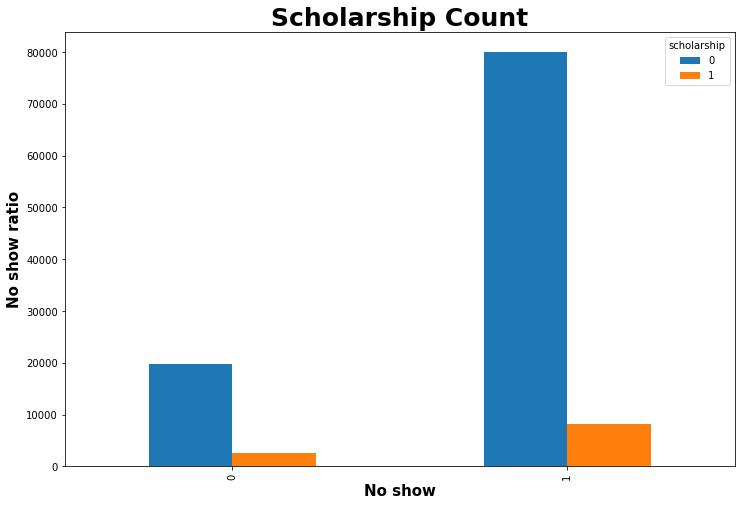

In [51]:
clean_df.groupby(['scholarship','no_show']).size().unstack('scholarship').plot(kind='bar', figsize=(12,8))
plt.title("Scholarship Count", weight='bold', fontsize=25)
plt.ylabel("No show ratio", weight='bold', fontsize=15)
plt.xlabel("No show", weight='bold', fontsize=15)
plt.show()

- Patients who are not enrolled in the scholarship seems to have a higher rate of attending appointments as compared to those who are enrolled in the program.

<a id='conclusions'></a>
## Conclusions
- The aim of the investigation was to investigate a dataset with information obtained from 100 thousand medical appointments in Brazil to determine which factors contribute to individuals showing up or not showing up for their appointments.
- In order to do that the following questions were posed:

>1. Is the younger generation likely to miss their appointments as compared to the older generation?
     - To answer this question , two box plots were created to compare the group of patients who showed up and those who did not       show up. 
     - The mean,  median, interquartile range of thos who showed up was slightly hohjer than for those who did not show and from this it can be concluded that age does not have much impact in whether a patient will show up or miss appointments.


>2. Females are most likely to show up for appointments?
     - The data was grouped by gender and no show to determine which gender is most likely not show up for their appointment.
     - The data showed that females are most like to show up for appointments as compaterd to males.
 
>3. Patients who received sms's are most likely to show up for their appointments?
     - Surprisingly patients who did not receive sms's tend to show up to appointments more than those who received sms's

  
>4. Patients who are diabetic are most likely to attend appointments?
    - Patients who are diabetic have lower turn up than those who are not diabetic
 
>5. Patients with hipertension are most likely to show up for appointments?
    - patients with hipertension have a lower turn up to appontments as compared to those without without hipertension.

>6. Patients who do not take alcohol are most likely to attend appointments
    - Patients who do not take alcohol are most likely to show up for appointments as compared to those who takes alcohol.
 
>7. Patients who are enrolled in scholarship are most likely to show up for appointments
    - Patients not enrolled in the scholarship have a much lower  rate of showing up to appointments as compared to those are         enrolled in scholarship.
 

  
- The dataset contained 110527 samples which it is believed it was a good sample for the purpose of this analysis.
- The dataset contained no missing values and no duplicates which is a good thing as we can be sure the analysis was not distorted in any way in that regard
- The limitations for the analysis were the outliers. The dataset contained outliers in the age feature which further investigation would need to be done. 
- The other limitation is the fact that the data is imbalanced as can be seen on visuals. Imbalanced data can lead to poor model performance and distorted or unfair results.
- Also the age feature contained a -1 age age which for the purpose of this analysis were dropped. Further investigation would need to be conducted regarding the -1 age as there is no person with a negative age.
- Additional research can be done on the distance between where patients reside and the hospitals. Samples on the distance can be collected  to determine whether distance is a contributor of no show.


In [52]:
clean_df.to_csv('new_df_v1')